# Kaggle notebook for Sarcasm detection
## August 25th 2019 
## [Kaggle Notebook link](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection#Sarcasm_Headlines_Dataset.json)

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

1.13.1


In [23]:
df = pd.read_json("sarcasm.json", lines= True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


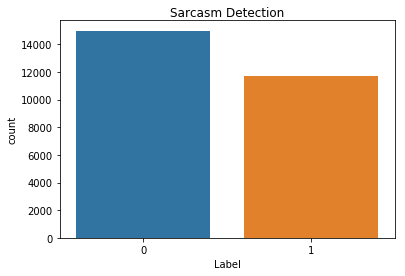

In [24]:
sns.countplot(df.is_sarcastic)
plt.xlabel('Label')
plt.title('Sarcasm Detection')

In [37]:
sentences= list(df.headline)
### Generate the Tokenizer:
tokenizer= Tokenizer(oov_token= '<OOV>')
tokenizer.fit_on_texts(sentences)
word_index= tokenizer.word_index

sequences= tokenizer.texts_to_sequences(sentences)
padded= pad_sequences(sequences=sequences, padding= 'post') #put '0' after the sentence
print("Word index length: ",len(word_index), "\n")
print("Sentence: \n",sentences[2], "\n")
print("Padded: \n",padded[2], "\n")
print(padded.shape)


Word index length:  29657 

Sentence: 
 mom starting to fear son's web series closest thing she will have to grandchild 

Padded: 
 [  145   838     2   907  1749  2093   582  4719   221   143    39    46
     2 10736     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0] 

(26709, 40)
